# Team: Mert Öztürk, Justin Ströhle, Nico Tomasini

# K-Means Clustering Exercises

### Exercise 1: Compute the centroid of a list of points

* Implement a python function that computes the centroid of an array of points. 
* Visualize the points and the centroid using matplotlib (```plt.scatter()```could be helpful). 

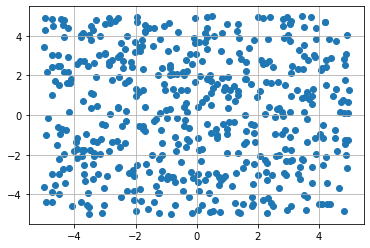

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random points
std = 5
mean = 0

X = mean + np.random.uniform(-1, 1, size=(500, 2)) * std
plt.scatter(X[:,0], X[:,1])
plt.grid(True)

[-0.05289516  0.11557915]


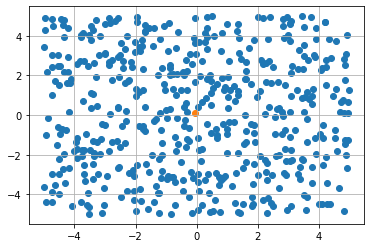

In [57]:
def calc_centroid(X):
  return np.mean(X, axis=0)

c = calc_centroid(X)
print(c)
plt.scatter(X[:,0], X[:,1])
plt.scatter(c[0], c[1])
plt.grid(True)

### Exercise 2: Implement the k-means Algorithm

* Implement the k-means algorithm, use X as your test data. 
* Use the ```plot_clusters()``` to visualize your results. 
* What happens when you run the clustering multiple times, how do the results change?


*Hints:*
* Use the ```np.random.choice()```function to select the indices to initialize the cluster centroids (use the ```replace=False``` parameter)
* You can initialize an empty numpy array using the ```np.zeros()``` function. 
* The ```np.argmin()``` function can be used to find the index of the smallest value in a numpy array. 
* Logical indexing can be very helpful here ```X[Y == 1, :]``` selects all vectors with a cluster label of 1.

**Use the follwing method stub:**
```python
def kmeans(X, k):
    """ Perform k-means clustering of data X into k partitions.
    
    Parameters
    ----------
    X: np.array
        A numpy array of feature vectors. 

    Returns
    ----------
    A one-dimensional numpy array containing the assigned cluster indices for each vector in X. 
```

In [58]:
# Use this function to plot your results. Notice: Only 2-dimensional features are supported. 
#
def plot_clusters(X:np.array, Y):
    assert X.shape[1] == 2, 'Can only plot for 2-dimensional vectors in X'
        
    for k in np.unique(Y):
        plt.scatter(X[Y == k, 0], X[Y == k, 1])

In [59]:
def calc_clusters(centroids, X, k, length):
  Y = np.zeros(length)
  for i in range(0, length):
    distances = []
    for j in range(0, k):
      distances.append(np.linalg.norm(X[i] - centroids[j]))
    min_index = np.argmin(distances)
    Y[i] = min_index
  return Y



Iterations:  32


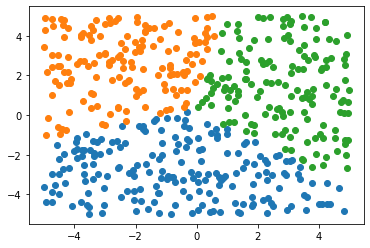

In [60]:
def kmeans(X, k):
  # initialization
  length = len(X)
  Y = np.zeros(length)
  indices = np.random.choice(len(X), k, replace=False)
  centroids = []
  for i in range(0, k):
    centroids.append(X[i])
  # assignment
  Y_updated = calc_clusters(centroids, X, k, length)
  # update
  iter = 0
  while not np.array_equal(Y, Y_updated):
    iter += 1
    centroids = []
    for i in range(0, k):
      centroids.append(calc_centroid(X[Y_updated == i, :]))
    Y = Y_updated
    Y_updated = calc_clusters(centroids, X, k, length)
  print("Iterations: ", iter)
  plot_clusters(X, Y)
  return Y

myLabels = kmeans(X, 3)

### Exercise 3: k-means in scikit-learn 

* Use the scikit-learn implementation of k-means to cluster X and compare the results to your implementation. 

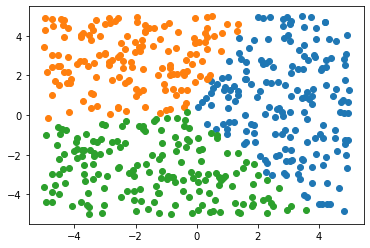

In [61]:
from sklearn.cluster import KMeans
skmeans = KMeans(n_clusters=3, random_state=1).fit(X)
skLabels = skmeans.labels_
plot_clusters(X, skLabels)


Both results look very similiar.

### Exercise 4: Silhouette

Use the ```silhouette_score()``` function in scikit-learn to determine the best number of cluster. Interpret and plot the results. To do so, perform kmeans clustering (use either scikit-learn or your own implementation) within a range of
clusters (2,k) and compute the silhouette score for your result. Print all silhouette scores and plot the clustering with the highest silhouette score. 

* Use the ```silhouette_score()``` function in scikit-learn to determine the best number of clusters. 
* Interpret and plot the results. 
* Compare the silhouette score of a random clustering (use ```random_labels=True```  parameter) to a meaningful clustering. 

In [62]:
# Generate data from k distinct clusters
def gen_data(k = 2, random_labels = False):
    X = []
    Y = []

    for i in range(k):
        std = np.random.randn() 
        mean = np.random.randn() + i

        tmp = mean + np.random.uniform(-1, 1, size=(50, 2)) * std
        X.append(tmp)
        Y.append(np.ones(50) * i)
    
    Y = np.array(Y).ravel()
    if random_labels:
        np.random.shuffle(Y)

    return np.array(X).reshape(k * 50, 2), Y

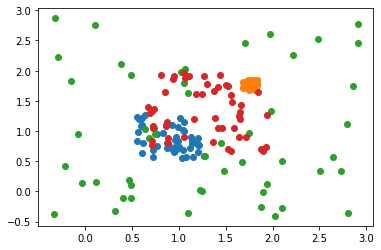

In [63]:
n_clusters = 4
X2, Y2 = gen_data(n_clusters)
plot_clusters(X2, Y2)

In [64]:
# Determining best number of clusters for dataset X

import sklearn.metrics as metrics

def calculate_silhouette_values(data_X):
    new_score_best = -2
    new_num_cluster_best = -1
    new_y2_best = []
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    silhouette_scores = []
    for k in range_n_clusters:
        res_means = KMeans(n_clusters=k, random_state=1).fit(data_X)
        res_lables = res_means.labels_
        score = metrics.silhouette_score(data_X, res_lables, metric='euclidean')
        silhouette_scores.append(score)
        print(k, score)
        if score > new_score_best:
            new_score_best = score
            new_num_cluster_best = k
            new_y2_best = res_lables

    return (new_num_cluster_best, new_score_best, new_y2_best, range_n_clusters, silhouette_scores)

tuple_5 = calculate_silhouette_values(X) # X is dataset used for KMeans implemenetations


2 0.36671385870513157
3 0.3850414784539958
4 0.405100798966458
5 0.39034790356124827
6 0.38935153836787745
7 0.38123043536365975
8 0.36611207841938376
9 0.35756867590991165
10 0.3686769804798971


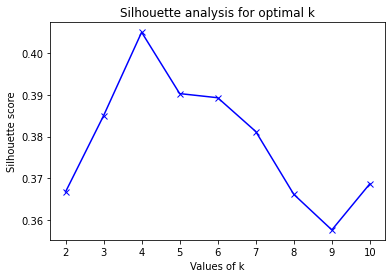

Best Result: 
Clusters: 4, Score: 0.405100798966458


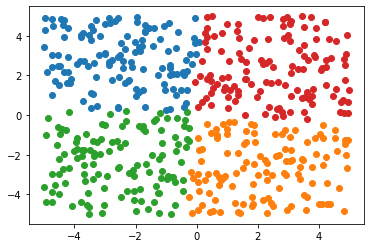

In [73]:
plt.plot(tuple_5[3], tuple_5[4], 'bx-')
plt.xlabel('Values of k')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for optimal k')
plt.show()

print(f'Best Result: \nClusters: {tuple_5[0]}, Score: {tuple_5[1]}')
plot_clusters(X, tuple_5[2])

For the dataset X, the silhouette scores do not vary dramatically, only between 0.35 and 0.41. (Will obviously differ after each execution)

-0.05224867417729653


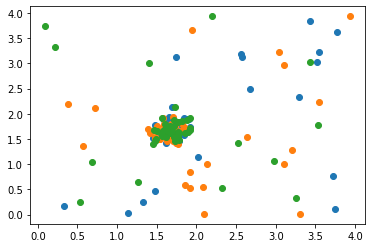

In [66]:
# Comparison silhouette score between random clustering and meaningful clustering
# Side note:
# We were not sure what "exactly" was meant by "meaningful clustering".
# We assumed that we just need to execute the gen_data function twice, once with "randomLables=True", once with "randomLables=False"

n_clusters = 3
X2_RAND, Y2_RAND = gen_data(n_clusters, random_labels=True)
plot_clusters(X2_RAND, Y2_RAND)

rand_score = metrics.silhouette_score(X2_RAND, Y2_RAND, metric='euclidean')
print(rand_score)


0.3345810699728582


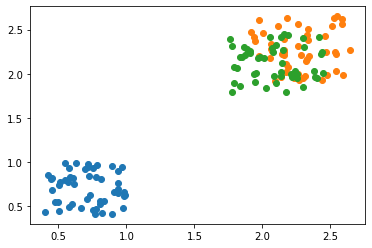

In [67]:
# Comparison contd. 
n_clusters = 3
X2, Y2 = gen_data(n_clusters, random_labels=False)
plot_clusters(X2, Y2)

meaningful_score = metrics.silhouette_score(X2, Y2, metric='euclidean')
print(meaningful_score)

With random clustering, we cannot cluster anything as the lables are randomly selected across a dataset. This is also why the silhouette score is negative.
However, with a meaningful clustering, the silhouette score is positive. The plot above already highlights the respective clusters.